In [1]:
!pip install tweepy

In [2]:
!pip install textblob

In [1]:
# Python Script to Extract tweets of a 
# particular Hashtag using Tweepy and Pandas
  
  
# import modules
import pandas as pd
import tweepy
import re
from textblob import TextBlob
import datetime
  
  
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
    print()
    print(f"Tweet {n}:")
    print(f"Username:{ith_tweet[0]}")
    print(f"Description:{ith_tweet[1]}")
    print(f"Location:{ith_tweet[2]}")
    print(f"Following Count:{ith_tweet[3]}")
    print(f"Follower Count:{ith_tweet[4]}")
    print(f"Total Tweets:{ith_tweet[5]}")
    print(f"Retweet Count:{ith_tweet[6]}")
    print(f"Tweet Text:{ith_tweet[7]}")
    print(f"Hashtags Used:{ith_tweet[8]}")
  
  
# function to perform data extraction
def scrape(words, numtweet):
      
    # Creating DataFrame using pandas
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following',
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'])
      
    # We are using .Cursor() to search through twitter for the required tweets.
    # The number of tweets can be restricted using .items(number of tweets)
    tweets = tweepy.Cursor(api.search_tweets, q=words, lang="en",tweet_mode='extended').items(numtweet)
     
    # .Cursor() returns an iterable object. Each item in 
    # the iterator has various attributes that you can access to 
    # get information about each tweet
    list_tweets = [tweet for tweet in tweets]
      
    # Counter to maintain Tweet Count
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet
    for tweet in list_tweets:
        username = tweet.user.screen_name
        description = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        retweetcount = tweet.retweet_count
        hashtags = tweet.entities['hashtags']
          
        # Retweets can be distinguished by a retweeted_status attribute,
        # in case it is an invalid reference, except block will be executed
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        hashtext = list()
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])
          
        # Here we are appending all the extracted information in the DataFrame
        ith_tweet = [username, description, location, following,
                     followers, totaltweets, retweetcount, text, hashtext]
        db.loc[len(db)] = ith_tweet
          
        # Function call to print tweet data on screen
        printtweetdata(i, ith_tweet)
        i = i+1
    filename = 'scraped_tweets.csv'
      
    # we will save our database as a CSV file.
    db.to_csv(filename,index_label='ID')

def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

if __name__ == '__main__':
      
    # Enter your own credentials obtained 
    # from your developer account
    consumer_key = "slX9b4GLjsJOZcc14j0OzuEdH"
    consumer_secret = "LJQ4dHP7kDvBpStWBqb2D2T7BIGcg0dSz78ok3L6oWRrLCGp57"
    access_key = "3648057914-PtTqFPr5UmwStbhSzH9aSqsDiAtjo7Ie2g5Jl5o"
    access_secret = "2o5w7f16AHFtfXGk2OQZ3H2DwtrRoeDzkb5pw2qCwY6Mz"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
      
    # Enter Hashtag and initial date
    print("Enter Twitter HashTag to search for")
    words = input()
#     print("Enter Date since The Tweets are required in yyyy-mm--dd")
#     date_since = input()
      
    # number of tweets you want to extract in one run
    numtweet = 1000  
    scrape(words, numtweet)
    now = datetime.datetime.now()
    print('Scraping has completed!')

Enter Twitter HashTag to search for
pfizer

Tweet 1:
Username:WRXavier
Description:Generally a Centerist, CAGW is a Fraud, The problem with Socialism is that eventually you run out of other peoples money, I will not be an Islamic Dhimmi.
Location:Australia
Following Count:372
Follower Count:389
Total Tweets:36855
Retweet Count:103
Tweet Text:The US Food and Drug Administration has elongated the timespan it will take to make public clinical data about Pfizer’s COVID-19 vaccine.

The FDA now says it will take 75 years to release the information.

https://t.co/FjQs7HuaOz
Hashtags Used:[]

Tweet 2:
Username:Bluecaribe2
Description:“Just the facts mam’”
Location:United States
Following Count:519
Follower Count:105
Total Tweets:15641
Retweet Count:3
Tweet Text:@stanza12000 @EatLiveHealthy1 @jagchat01 NO it really about our health everyone.  https://t.co/m3MexYT3QQ
Hashtags Used:[]

Tweet 3:
Username:OrthodoxReflec1
Description:Thoughts on a Life in Christian Orthodoxy
Location:US and Canada



Tweet 91:
Username:Osaaa911
Description:Safe place here / DM me anything pharm D major Fc Barcelona/ Novak Djokovic 🎾 #SaveSheikhJarrah 🇵🇸🇵🇸
Location:Dubai, United Arab Emirates
Following Count:2164
Follower Count:4040
Total Tweets:40868
Retweet Count:0
Tweet Text:Anyone took or knows if we can have a  third dose from Pfizer vaccine in Dubai? #rt #help
Hashtags Used:['rt', 'help']

Tweet 92:
Username:PoleyMagik
Description:✨ An aspiring artist with a fascination of Sonic ✨ He/Him (don't care if you get it wrong tho) ✨Programmer✨ Wannabe Gamedev ✨
Location:Somewhere
Following Count:153
Follower Count:128
Total Tweets:2387
Retweet Count:2267
Tweet Text:Man, apparently Pfizer's booster has a couple of pretty unexpected side effects https://t.co/JUaRQPCeAc
Hashtags Used:[]

Tweet 93:
Username:bdollabills
Description:"I'd like for them to say he took love, patience, generosity, kindness, laughter, concern, willingness, happiness, faith and shared it with everyone he met."
Location:Southern

Tweet 162:
Username:john_siracusa
Description:Staten Island, is where I live. It is a very nice borough in New York City. Visit the FDR Boardwalk in SouthBeach, my community. TakeALongWalk RideABike Breathe
Location:Staten Island, NY
Following Count:11644
Follower Count:16683
Total Tweets:867928
Retweet Count:0
Tweet Text:"Omicron significantly reduces Covid antibodies generated by Pfizer vaccine, study finds"  https://t.co/ZtnF9tsf7W
Hashtags Used:[]

Tweet 163:
Username:misstreemannz
Description:
Location:UK.
Following Count:352
Follower Count:66
Total Tweets:15332
Retweet Count:16
Tweet Text:Dr Jonie Girouard is a hero.

Some undercover journalist however filmed her giving out medical certificates as exemptions for Pfizer vaccines.

Police are now investigating this good woman.

https://t.co/aEj1GLFkqO https://t.co/bZbI3tWLYb
Hashtags Used:[]

Tweet 164:
Username:CAbainbridge
Description:
Location:
Following Count:92
Follower Count:32
Total Tweets:749
Retweet Count:0
Tweet Text:@Inf


Tweet 241:
Username:aeromedicaluk
Description:Accurate and affordable covid testing for travel.
E: covidtesting@aeromedicalconsulting.co.uk

#COVID #COVID19 #Coronavirus #CovidTest
Location:Global
Following Count:115
Follower Count:1
Total Tweets:31
Retweet Count:0
Tweet Text:Antibodies from Pfizer vaccine may be up to 40 times less effective against Omicron, first lab tests suggest.

#covid19 #coronavirus #coronavirus #pfizer https://t.co/0FerwOEwYw
Hashtags Used:['covid19', 'coronavirus', 'coronavirus', 'pfizer']

Tweet 242:
Username:LameBrainDommy
Description:
Location:Brisbane, Queensland
Following Count:161
Follower Count:4
Total Tweets:639
Retweet Count:360
Tweet Text:The Liberal and National parties have become the natural home of far right, anti-vacc, nut jobs. Together with  the Murdoch media. Bottom line: together they legitimise anti-science, vaccine hesitancy which threatens the health of all Australians.  https://t.co/5c5qpVTL8G
Hashtags Used:[]

Tweet 243:
Username:nrtur


Tweet 324:
Username:dawgstersnft
Description:Dawgsters is an NFT collection of 3, 333 awesome, unique, and precious dogs. #LTDO #Dwgstrs #DawgFam join our Dawg family - https://t.co/ehezpXP9Le
Location:CryptoWorld
Following Count:697
Follower Count:861
Total Tweets:81
Retweet Count:0
Tweet Text:@Effie_Sunshine I just got 1 shot of pfizer, not feeling okay...
Hashtags Used:[]

Tweet 325:
Username:Shauncxrp
Description:
Location:Canada
Following Count:862
Follower Count:270
Total Tweets:4687
Retweet Count:53
Tweet Text:Who is ready to roll the dice for the fourth time in a year?

What's the worst that can happen? 😑
https://t.co/kBAPmScO2X
Hashtags Used:[]

Tweet 326:
Username:JimBulger3
Description:I am a fully vaccinated Canadian. So happy.
Location:
Following Count:77
Follower Count:94
Total Tweets:37137
Retweet Count:3768
Tweet Text:The new data from Pfizer on vaccine effectiveness against Omicron is encouraging. This reinforces what my medical advisors have been emphasizing: that bo


Tweet 402:
Username:EivarGalindez
Description:Mind Scientist
Location:
Following Count:100
Follower Count:17
Total Tweets:2645
Retweet Count:0
Tweet Text:More than 120 students in the Vietnamese province of Thanh Hoa were hospitalized after receiving the Pfizer-BioNTech vaccine. Thanh Hoa has been immunizing children aged 15 to 17 years old, but over 120 of them have had adverse responses, 17 of which were severe, (CDC) said.
Hashtags Used:[]

Tweet 403:
Username:MsAccountabilit
Description:Focusing on truth, personal responsibility, and congruent actions.... while pointing out the greater incongruencies of human behavior
Location:
Following Count:3552
Follower Count:1826
Total Tweets:32306
Retweet Count:0
Tweet Text:Every single #Guru asked to comment re. #Omicron specifically or #Coronavirus in general should be asked about #ConflictOfInterest

*WHO funds their research? Do they have grants from #Pfizer/ #Moderna, etc. or even #WHO? WHY push #Vaccine&gt;antibodies

#Bloomberg, talki


Tweet 480:
Username:Noris_Maingey
Description:#SpeakYourMind✊🏿
#ProtectWildlife✊🏿
#ProtectChildren✊🏿
#TribelessYouth✊🏿
#IStandAgainstPoliceButality✊🏿
#SaveThePlanet😥
#NoToDv😔
#climatechange😥
Location:Nairobi, Kenya
Following Count:31
Follower Count:138
Total Tweets:7458
Retweet Count:531
Tweet Text:Preliminary lab studies show two doses of the Pfizer/BioNTech vaccine may not provide sufficient protection against the Omicron coronavirus variant, but three doses are able to neutralize it, the companies said in a news release. https://t.co/VtsVe1Vdwe
Hashtags Used:[]

Tweet 481:
Username:InformedNJNurse
Description:We are Frontline RN’s who advocate for Medical Choice and Informed Consent!
Location:New Jersey, USA
Following Count:901
Follower Count:17440
Total Tweets:12277
Retweet Count:3
Tweet Text:Pfizer and BioNTech said Wednesday that two doses of their COVID-19 vaccine “may not” offer sufficient protection against the omicron variant of SARS-CoV-2, but a third dose appears to improv

Tweet 558:
Username:SydneyKSDK
Description:Morning Reporter, Anchor  @KSDKNews• Wake up with me on ‘Today in St. Louis’ !☀️☕️ • Howard University Alumna
Location:Huntsville, AL
Following Count:437
Follower Count:654
Total Tweets:1202
Retweet Count:1
Tweet Text:Pfizer and Moderna have practiced tweaking their shots against earlier mutants so they’d know how to do so, but making new doses still would take months. https://t.co/5xYTrSUOnO
Hashtags Used:[]

Tweet 559:
Username:chronos2002
Description:
Location:Adelaide, South Australia
Following Count:77
Follower Count:133
Total Tweets:24912
Retweet Count:103
Tweet Text:The US Food and Drug Administration has elongated the timespan it will take to make public clinical data about Pfizer’s COVID-19 vaccine.

The FDA now says it will take 75 years to release the information.

https://t.co/FjQs7HuaOz
Hashtags Used:[]

Tweet 560:
Username:TomJ8899
Description:'The whole thing (EU) is an absurdity. I urge you to reject it'

MP Peter Shore, Oxford

Tweet 636:
Username:ryotashin3587
Description:
Location:
Following Count:1183
Follower Count:578
Total Tweets:268965
Retweet Count:3953
Tweet Text:&lt;data and the truth want to break free, and eventually will.  Best to come clean sooner. The coverup is what will git ya.&gt;

GUY HATCHARD: PFIZER DOCUMENT CONCEDES THAT THERE IS A LARGE INCREASE IN TYPES OF ADVERSE EVENT REACTION TO ITS VACCINE
https://t.co/kupDIViH41
Hashtags Used:[]

Tweet 637:
Username:MarieW95157300
Description:What a fab reset! Can't wait for the 10th booster to 🎯 my brain. Transhuman all the way.
Location:
Following Count:235
Follower Count:105
Total Tweets:7409
Retweet Count:166
Tweet Text:We were told Pfizer's "vaccine" was 95% effective. Do you know why? I'll tell you. 2 out of 22,000 people died in the control group, and 1 out of roughly the same number died in the "vaccinated" group. SOLELY on this basis, they claimed the jab was 100% effective. True story.
Hashtags Used:[]

Tweet 638:
Username:stevero4010446


Tweet 710:
Username:spencerwalker17
Description:
Location:
Following Count:271
Follower Count:63
Total Tweets:3800
Retweet Count:1366
Tweet Text:I totally believe this, given that we discovered “Omicron” last week. Sounds plausible they already conducted a study showing three shots of Pfizer is protective against it. https://t.co/MtNhZmFvKC
Hashtags Used:[]

Tweet 711:
Username:leoharmon65
Description:#truthseeker
Location:
Following Count:682
Follower Count:125
Total Tweets:4876
Retweet Count:544
Tweet Text:It's getting real folks. FOIA document released - 1,200 deaths reported following @pfizer #COVID19 #vaccine, with a significant number within the first 24 hours. 

MSM? 🦗🦗🦗

#VaccineDeaths  
#standup 

https://t.co/XMvrrTovVO https://t.co/P9wZyckHOX
Hashtags Used:['COVID19', 'vaccine']

Tweet 712:
Username:Slicedbutter111
Description:waking up 🐑
Location:
Following Count:44
Follower Count:18
Total Tweets:1054
Retweet Count:1873
Tweet Text:Pfizer won’t deliver their product in coun

Tweet 797:
Username:SaveRDemocrazy
Description:All life matters. There are no small acts of kindness. #BLM #GoodTrouble #AnimalRights #HereRightMatters #NoPlanetB #ARepublicIfYouCanKeepIt All lies matter.
Location:Alaska
Following Count:10047
Follower Count:10012
Total Tweets:244246
Retweet Count:20
Tweet Text:Pfizer Provides Update on Omicron Variant https://t.co/pxpML3rvxh

Important: “As 80% of epitopes in the spike protein recognized by CD8+ T cells are not affected by the mutations in the Omicron variant, two doses may still induce protection against severe disease”
Hashtags Used:[]

Tweet 798:
Username:joshman130
Description:
Location:
Following Count:587
Follower Count:24
Total Tweets:553
Retweet Count:0
Tweet Text:@JOEL9ONE Pfizer 3 knocked me on my ass for 3 days, rly lethargic and tired.
Hashtags Used:[]

Tweet 799:
Username:KaraAiello
Description:Social Worker, Dancer & member of American Dance Wheels Foundation, Amnesty International, Free Lance Writer for MobileWOMEN,  lov


Tweet 868:
Username:lizzie_kristina
Description:I’m me. American Studies graduate. Portsmouth resident. Cat Lady. Peter Capaldi fan. European✨💕🇪🇺 Proudly Asexual
Location:The TARDIS
Following Count:190
Follower Count:192
Total Tweets:22978
Retweet Count:14
Tweet Text:Massive difference between two doses of ChadOx(AstraZeneca) or  BNT162b2 (Pfizer) vaccine or one dose of each in neutralising omicron in this study. Good news for protection in places like the UK where AZ was widely used. But Pfizer/Moderna to boost? https://t.co/0OiYo37vaj
Hashtags Used:[]

Tweet 869:
Username:TalysAlankil
Description:Raw, organic bisexual (he/him). Educator, AI Engineer, aspiring author. Runs @snarktheater, admin @KHWikiFR.

Header art by @rainbowd00dles
Location:Brussels
Following Count:371
Follower Count:387
Total Tweets:145327
Retweet Count:2267
Tweet Text:Man, apparently Pfizer's booster has a couple of pretty unexpected side effects https://t.co/JUaRQPCeAc
Hashtags Used:[]

Tweet 870:
Username:Simp

Tweet 941:
Username:giizhigokwe01
Description:TREATY RIGHTS!  "With These Hands" ACLU Member, I SWEAR A LOT!  Twitter political Junky. It's all about the Bern! @DFAaction @JusticeDems Let's Go! #StopLine3
Location:Minneapolis
Following Count:4355
Follower Count:2834
Total Tweets:55709
Retweet Count:0
Tweet Text:@pfizer Reduce your pricing and stop telling the world your greed is acceptable.  Buying legislators and peddling lies needs to stop. Killing people bc they can't afford your drugs is criminal.
Hashtags Used:[]

Tweet 942:
Username:FeFiFo_um
Description:#ThisWitchDontBurn
Location:
Following Count:483
Follower Count:301
Total Tweets:8745
Retweet Count:27
Tweet Text:@nntaleb I’m in the ER right now.... getting tested for clots.... immediate tightness after second Pfizer.... kindA regretting not holding out
Hashtags Used:[]

Tweet 943:
Username:Mr_NormalStreet
Description:The opinions of a normal human, the ones people are scared to say normally
Location:
Following Count:261
Follo

Scraping has completed!


In [2]:
df = pd.read_csv('scraped_tweets.csv')
tlist = []
for tt in df['text']:
    tlist.append(clean_tweet(tt))
df['clean_tweet'] = tlist
tlist = []
for tt in df['clean_tweet']:
    tlist.append(get_tweet_sentiment(tt))
df['sentiment'] = tlist
pd.set_option('display.max_colwidth', 50000)
pd.set_option('display.max_rows', 100)
df[['clean_tweet','sentiment']]

,clean_tweet,sentiment
0,The US Food and Drug Administration has elongated the timespan it will take to make public clinical data about Pfizer s COVID 19 vaccine The FDA now says it will take 75 years to release the information,neutral
1,NO it really about our health everyone,positive
2,Good So quit trying to ram your jab down everyone s throat and be content to sell your expensive cold pills It is really nice you admit this finally and we can t wait till your reps are telling this to doctors over donuts,positive
3,Pfizer CEO predicts a fourth shot might be needed in light of omicron variant,positive
4,Can Pfizer and Moderna be sued for false advertising Asking any lawyers or legal big brains to weigh in,negative
...,...,...
995,That got compromised Agenda21,neutral
996,then I dey go take pfizer a few weeks ago but for some reason I never went,negative
997,Kevin Rudd is paid by an organization who is supported by Pfizer Next time you want to promote their interests over the health of the Australian people be sure to disclose your conflict of interest Kevin auspol,positive
998,Dr Jonie Girouard is a hero Some undercover journalist however filmed her giving out medical certificates as exemptions for Pfizer vaccines Police are now investigating this good woman,positive


In [3]:
df

,ID,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,clean_tweet,sentiment
0,0,WRXavier,"Generally a Centerist, CAGW is a Fraud, The problem with Socialism is that eventually you run out of other peoples money, I will not be an Islamic Dhimmi.",Australia,372,389,36855,103,The US Food and Drug Administration has elongated the timespan it will take to make public clinical data about Pfizer’s COVID-19 vaccine.\n\nThe FDA now says it will take 75 years to release the information.\n\nhttps://t.co/FjQs7HuaOz,[],The US Food and Drug Administration has elongated the timespan it will take to make public clinical data about Pfizer s COVID 19 vaccine The FDA now says it will take 75 years to release the information,neutral
1,1,Bluecaribe2,“Just the facts mam’”,United States,519,105,15641,3,@stanza12000 @EatLiveHealthy1 @jagchat01 NO it really about our health everyone. https://t.co/m3MexYT3QQ,[],NO it really about our health everyone,positive
2,2,OrthodoxReflec1,Thoughts on a Life in Christian Orthodoxy,US and Canada,304,1341,11706,0,"Good. So quit trying to ram your jab down everyone’s throat and be content to sell your expensive cold pills. It is really nice you admit this finally, and we can’t wait till your reps are telling this to doctors over donuts. https://t.co/YacaLYSldG",[],Good So quit trying to ram your jab down everyone s throat and be content to sell your expensive cold pills It is really nice you admit this finally and we can t wait till your reps are telling this to doctors over donuts,positive
3,3,maureencoert,"‘Each time a woman stands up for herself, without knowing it possibly, without claiming it, she stands up for all women’~Maya Angelou ~ and be kind",Int.city of peace and justice,1876,1214,129166,17,Pfizer CEO predicts a fourth shot might be needed in light of omicron variant https://t.co/psrh5r3esk,[],Pfizer CEO predicts a fourth shot might be needed in light of omicron variant,positive
4,4,nanc_eeeee,"🚫DM,’50’s Boomer,🌹HarleyMomma Dog&Cat Mom #MAGA #KAG #TRUMP #NoSharia #WalkAway #Love4Laila #VWM 😡NO MANDATES🇺🇸NO 1984 #TermLimits #AuditGOVT #DeadHead",Central Coast CA,7691,7498,188355,247,Can Pfizer and Moderna be sued for ‘false advertising’? Asking any lawyers or legal big brains to weigh in.,[],Can Pfizer and Moderna be sued for false advertising Asking any lawyers or legal big brains to weigh in,negative
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,zoominfire,Corporate Trainer • Actor • Poet • Photographer,Italy,258,177,27034,0,That got compromised! \n\n#Agenda21\n\nhttps://t.co/QvFPj5BJHp,['Agenda21'],That got compromised Agenda21,neutral
996,996,okotoothelion,NaN,NaN,976,291,2061,0,@ballonstagger then I dey go take pfizer a few weeks ago but for some reason I never went😹,[],then I dey go take pfizer a few weeks ago but for some reason I never went,negative
997,997,cptmphil,NaN,NaN,505,192,31832,291,Kevin Rudd is paid by an organization who is supported by Pfizer. Next time you want to promote their interests over the health of the Australian people be sure to disclose your conflict of interest Kevin. #auspol https://t.co/RHWmHm3p2G,[],Kevin Rudd is paid by an organization who is supported by Pfizer Next time you want to promote their interests over the health of the Australian people be sure to disclose your conflict of interest Kevin auspol,positive
998,998,KhatBlac,NaN,Ether,49,40,2068,16,Dr Jonie Girouard is a hero.\n\nSome undercover journalist however filmed her giving out medical certificates as exemptions for Pfizer vaccines.\n\nPolice are now investigating this good woman.\n\nhttps://t.co/aEj1GLFkqO https://t.co/bZbI3tWLYb,[],Dr Jonie Girouard is a hero Some undercover journalist however filmed her giving out medical certificates as exemptions for Pfizer vaccines Police are now investigating this good woman,positive


In [4]:
df2 = df.groupby('sentiment')['ID'].nunique()
Sscore = df2['positive']/(df2['negative']+1)
print(df2,Sscore)

sentiment
negative    165
neutral     333
positive    502
Name: ID, dtype: int64 3.0240963855421685


In [ ]:
# #for first time creating file/dataframe
# df3 = pd.DataFrame(columns=['Date','VaccineName','SentimentScore','Positive','Negative','Neutral'])
# df3.loc[len(df3)] = [now,words,Sscore,df2['positive'],df2['negative'],df2['neutral']]
# df3.to_csv('Twitter_Sentiment_Vaccines_astrazeneca.csv',index_label='ID')


In [5]:
df3 = pd.read_csv('Twitter_Sentiment_Vaccines_pfizer.csv')
df3 = df3.drop(['ID'], axis=1)
df3

,Date,VaccineName,SentimentScore,Positive,Negative,Neutral
0,2021-12-09 17:03:10.603643,pfizer,3.390533,573,168,259
1,2021-12-09 17:03:10.603643,pfizer,3.390533,573,168,259


In [6]:
df3.loc[len(df3)] = [now,words,Sscore,df2['positive'],df2['negative'],df2['neutral']]
df3.to_csv('Twitter_Sentiment_Vaccines_pfizer.csv',index_label='ID')
df3

,Date,VaccineName,SentimentScore,Positive,Negative,Neutral
0,2021-12-09 17:03:10.603643,pfizer,3.390533,573,168,259
1,2021-12-09 17:03:10.603643,pfizer,3.390533,573,168,259
2,2021-12-09 19:06:11.836084,pfizer,3.024096,502,165,333


Pfizer
Positive 502
Negative 165
Neutral 333
Score =  3.0240963855421685


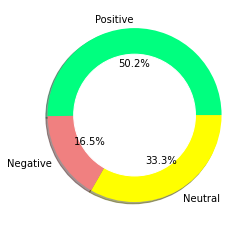

In [32]:
import matplotlib.pyplot as plt 
df_pfi = pd.read_csv('Twitter_Sentiment_Vaccines_pfizer.csv')
mylabels = ["Positive","Negative","Neutral"]
mycolors = ["SpringGreen", "lightcoral", "Yellow"]
pos_pfizer = df_pfi['Positive']
neg_pfizer = df_pfi['Negative']
neu_pfizer = df_pfi['Neutral']
print("Pfizer")
print("Positive",pos_pfizer[len(df_pfi)-1])
print("Negative",neg_pfizer[len(df_pfi)-1])
print("Neutral",neu_pfizer[len(df_pfi)-1])
print("Score = ",df_pfi['SentimentScore'][len(df_pfi)-1])
pie_pfizer =[pos_pfizer[len(df_pfi)-1],neg_pfizer[len(df_pfi)-1],neu_pfizer[len(df_pfi)-1]]
plt.pie(pie_pfizer ,labels = mylabels,colors = mycolors,autopct='%1.1f%%', shadow=True)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Moderna
Positive 655
Negative 145
Neutral 200
Score =  4.486301369863014


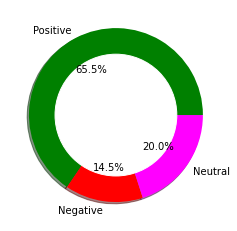

In [33]:
df_mod = pd.read_csv('Twitter_Sentiment_Vaccines_moderna.csv')
mylabels = ["Positive","Negative","Neutral"]
mycolors = ["Green", "Red", "Magenta"]
pos_mod = df_mod['Positive']
neg_mod = df_mod['Negative']
neu_mod = df_mod['Neutral']
print("Moderna")
print("Positive",pos_mod[len(df_mod)-1])
print("Negative",neg_mod[len(df_mod)-1])
print("Neutral",neu_mod[len(df_mod)-1])
print("Score = ",df_mod['SentimentScore'][len(df_mod)-1])
pie_mod =[pos_mod[len(df_mod)-1],neg_mod[len(df_mod)-1],neu_mod[len(df_mod)-1]]
plt.pie(pie_mod ,labels = mylabels,colors = mycolors,autopct='%1.1f%%', shadow=True)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Astrazeneca
Positive 464
Negative 86
Neutral 450
Score =  5.333333333333333


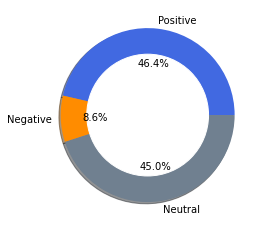

In [34]:
df_az = pd.read_csv('Twitter_Sentiment_Vaccines_astrazeneca.csv')
mylabels = ["Positive","Negative","Neutral"]
mycolors = ["RoyalBlue", "DarkOrange", "Slategrey"]
pos_az = df_az['Positive']
neg_az = df_az['Negative']
neu_az = df_az['Neutral']
print("Astrazeneca")
print("Positive",pos_az[len(df_az)-1])
print("Negative",neg_az[len(df_az)-1])
print("Neutral",neu_az[len(df_az)-1])
print("Score = ",df_az['SentimentScore'][len(df_az)-1])
pie_az =[pos_az[len(df_az)-1],neg_az[len(df_az)-1],neu_az[len(df_az)-1]]
plt.pie(pie_az ,labels = mylabels,colors = mycolors,autopct='%1.1f%%', shadow=True)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Sinopharm
Positive 402
Negative 149
Neutral 449
Score =  2.68


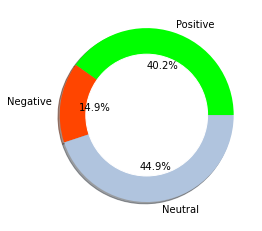

In [35]:
df_sp = pd.read_csv('Twitter_Sentiment_Vaccines_sinopharm.csv')
mylabels = ["Positive","Negative","Neutral"]
mycolors = ["Lime", "OrangeRed", "lightsteelblue"]
pos_sp = df_sp['Positive']
neg_sp = df_sp['Negative']
neu_sp = df_sp['Neutral']
print("Sinopharm")
print("Positive",pos_sp[len(df_sp)-1])
print("Negative",neg_sp[len(df_sp)-1])
print("Neutral",neu_sp[len(df_sp)-1])
print("Score = ",df_sp['SentimentScore'][len(df_sp)-1])
pie_sp =[pos_sp[len(df_sp)-1],neg_sp[len(df_sp)-1],neu_sp[len(df_sp)-1]]
plt.pie(pie_sp ,labels = mylabels,colors = mycolors,autopct='%1.1f%%', shadow=True)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Sinovac
Positive 668
Negative 87
Neutral 245
Score =  7.590909090909091


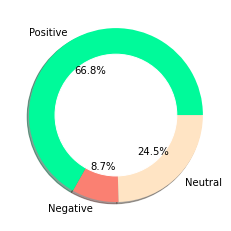

In [36]:
df_sv = pd.read_csv('Twitter_Sentiment_Vaccines_sinovac.csv')
mylabels = ["Positive","Negative","Neutral"]
mycolors = ["MediumSpringGreen", "Salmon", "Bisque"]
pos_sv = df_sv['Positive']
neg_sv = df_sv['Negative']
neu_sv = df_sv['Neutral']
print("Sinovac")
print("Positive",pos_sv[len(df_sv)-1])
print("Negative",neg_sv[len(df_sv)-1])
print("Neutral",neu_sv[len(df_sv)-1])
print("Score = ",df_sv['SentimentScore'][len(df_sv)-1])
pie_sv =[pos_sv[len(df_sv)-1],neg_sv[len(df_sv)-1],neu_sv[len(df_sv)-1]]
plt.pie(pie_sv ,labels = mylabels,colors = mycolors,autopct='%1.1f%%', shadow=True)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

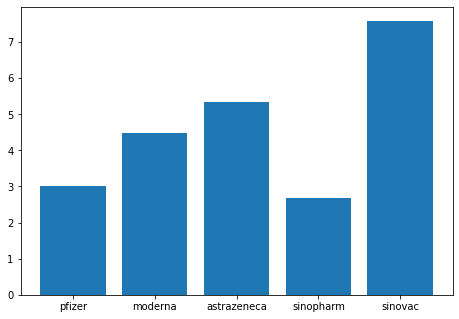

,Date,VaccineName,SentimentScore,Positive,Negative,Neutral
4,2021-12-09 17:22:45.301627,sinovac,7.590909,668,87,245
2,2021-12-09 17:34:18.903177,astrazeneca,5.333333,464,86,450
1,2021-12-09 17:08:30.926619,moderna,4.486301,655,145,200
0,2021-12-09 19:06:11.836084,pfizer,3.024096,502,165,333
3,2021-12-09 17:19:05.203610,sinopharm,2.680000,402,149,449


In [49]:
df_final = pd.DataFrame(columns=['Date','VaccineName','SentimentScore','Positive','Negative','Neutral'])
df_final.loc[len(df_final)] = df_pfi.loc[len(df_pfi)-1]
df_final.loc[len(df_final)] = df_mod.loc[len(df_mod)-1]
df_final.loc[len(df_final)] = df_az.loc[len(df_az)-1]
df_final.loc[len(df_final)] = df_sp.loc[len(df_sp)-1]
df_final.loc[len(df_final)] = df_sv.loc[len(df_sv)-1]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Vac = df_final['VaccineName']
SfinalScore = df_final['SentimentScore']
ax.bar(Vac,SfinalScore)
plt.show()
df_final.sort_values(by=['SentimentScore'],ascending=False)